# Alpaca Demo

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [7]:
# Set the tickers
tickers = ["DJI", "TWTR"]

In [8]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [17]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-14 04:00:00+00:00,236.76,240.33,232.03,239.73,23377376,244837,236.977422,FB
2020-07-14 04:00:00+00:00,33.53,34.66,33.44,34.38,18533247,96659,34.155406,TWTR


In [10]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [11]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-07-15 04:00:00+00:00,204.25,205.3300,201.8200,203.91,16030335,144227,203.864930,FB
2019-07-16 04:00:00+00:00,203.89,205.4707,203.1000,203.84,12132853,107939,204.136607,FB
2019-07-17 04:00:00+00:00,204.18,204.3600,201.5900,201.80,12083714,112848,202.538952,FB
2019-07-18 04:00:00+00:00,200.15,202.4700,199.3800,200.78,11956554,111375,200.621676,FB
2019-07-19 04:00:00+00:00,202.18,202.3300,198.0700,198.36,12098262,103177,200.150804,FB
2019-07-22 04:00:00+00:00,199.91,202.5700,198.8100,202.32,13593469,120193,201.256328,FB
2019-07-23 04:00:00+00:00,202.84,204.2420,200.9625,202.36,15453787,123226,202.419399,FB
2019-07-24 04:00:00+00:00,197.63,204.8100,197.2200,204.66,32560655,271256,203.374209,FB
2019-07-25 04:00:00+00:00,206.70,208.6600,198.2600,200.71,39890754,341776,201.495967,FB


In [19]:
# Reorganize the DataFrame

# Separate ticker data
FB = df_portfolio_year[df_portfolio_year['symbol']=='DJI'].drop('symbol', axis=1)
TWTR = df_portfolio_year[df_portfolio_year['symbol']=='TWTR'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([DJI, TWTR],axis=1, keys=['DJI','TWTR'])

# Display sample data
df_portfolio_year

KeyError: 'symbol'

In [13]:
df_portfolio_year.tail(10)

FB                                     \
                              open     high     low   close    volume   
timestamp                                                               
2020-06-30 04:00:00+00:00  220.590  227.500  218.47  227.07  33927068   
2020-07-01 04:00:00+00:00  228.500  239.000  227.56  237.55  43400289   
2020-07-02 04:00:00+00:00  239.000  240.000  232.61  233.42  30633620   
2020-07-06 04:00:00+00:00  233.760  240.400  232.27  240.28  26208458   
2020-07-07 04:00:00+00:00  239.410  247.650  238.82  240.86  27887936   
2020-07-08 04:00:00+00:00  238.110  246.990  236.59  243.58  29792601   
2020-07-09 04:00:00+00:00  245.000  246.525  239.24  244.50  22174896   
2020-07-10 04:00:00+00:00  243.685  245.490  239.32  245.07  22982716   
2020-07-13 04:00:00+00:00  247.005  250.150  238.42  239.00  24674874   
2020-07-14 04:00:00+00:00  236.760  240.330  232.03  239.73  23377376   

                                                    TWTR                 \
                          trade_count        vwap   open   high     low   
timestamp                                                                 
2020-06-30 04:00:00+00:00      317095  223.456632  29.63  29.82  29.020   
2020-07-01 04:00:00+00:00      400706  234.434059  30.15  31.17  30.060   
2020-07-02 04:00:00+00:00      298883  235.449576  31.30  31.40  30.395   
2020-07-06 04:00:00+00:00      256191  237.814047  31.55  32.81  31.155   
2020-07-07 04:00:00+00:00      279309  243.701442  31.96  33.67  31.765   
2020-07-08 04:00:00+00:00      290455  241.524051  33.20  36.98  32.730   
2020-07-09 04:00:00+00:00      238901  243.256494  35.88  36.18  34.810   
2020-07-10 04:00:00+00:00      235954  242.838983  35.46  35.76  34.860   
2020-07-13 04:00:00+00:00      260452  245.480503  35.72  36.21  33.760   
2020-07-14 04:00:00+00:00      244837  236.977422  33.53  34.66  33.440   

                                                                    
                           close     volume trade_count       vwap  
timestamp                                                           
2020-06-30 04:00:00+00:00  29.79   20647989      103236  29.513379  
2020-07-01 04:00:00+00:00  30.81   20778996      117033  30.798470  
2020-07-02 04:00:00+00:00  30.87   14553748       79762  30.964838  
2020-07-06 04:00:00+00:00  32.34   22399973      112346  32.251229  
2020-07-07 04:00:00+00:00  32.99   27940979      117529  33.004086  
2020-07-08 04:00:00+00:00  35.41  109663752      418558  35.449965  
2020-07-09 04:00:00+00:00  35.72   34648752      137866  35.624052  
2020-07-10 04:00:00+00:00  35.40   15238716       85060  35.175548  
2020-07-13 04:00:00+00:00  33.82   22480572      103831  34.841834  
2020-07-14 04:00:00+00:00  34.38   18533247       96659  34.155406

In [14]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["FB"] = df_portfolio_year["FB"]["close"]
df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,FB,TWTR
2019-07-15,203.91,38.68
2019-07-16,203.84,37.99
2019-07-17,201.80,37.70
2019-07-18,200.78,37.66
2019-07-19,198.36,36.77
2019-07-22,202.32,37.58
2019-07-23,202.36,37.90
2019-07-24,204.66,38.73
2019-07-25,200.71,38.12
2019-07-26,199.75,41.52


In [15]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,FB,TWTR
2019-07-16,-0.000343,-0.017839
2019-07-17,-0.010008,-0.007634
2019-07-18,-0.005055,-0.001061
2019-07-19,-0.012053,-0.023633
2019-07-22,0.019964,0.022029


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR over the Last Year'}>

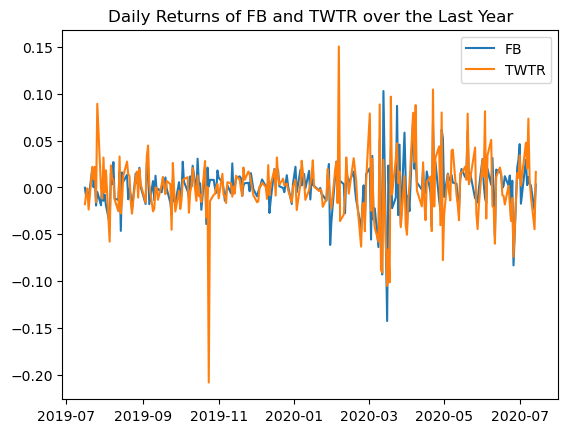

In [16]:
# Plot daily returns
df_daily_returns.plot(title="Daily Returns of FB and TWTR over the Last Year")